In [24]:
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline



# retinas

In [25]:
from retina.retina_theanized import Retina

In [ ]:
# retina that sits after VELO
ks = np.zeros(3)
ks[2]+=2000
xdim = ydim = 64
dalpha = np.pi/8
dbeta = np.pi/8
alpha = 0
beta = 0
alphas = np.linspace(-dalpha+alpha, alpha+dalpha,num=xdim)
bethas = np.linspace(-dbeta+beta, beta+dbeta,num=ydim)
sigma = 50
#ks = KS[evtids_ks[i]][2]

retina_afterVelo = Retina(ks,alphas,bethas,variance=sigma)

In [26]:
#retina testing

def test(retina):
    from retinize import retinize_folder
    imgs= retinize_folder("/mnt/KSfinder/mc_sig_hits/", retina, out_file=None, max_rows=8 ,n_shards=8)

    for i in range(len(imgs)):
        from matplotlib import pyplot as plt
        %matplotlib inline
        plt.imshow(imgs[i].reshape(32,32))
        plt.show()

In [27]:
# retina that sits after VELO
ks = np.zeros(3)
ks[2]+=2000
xdim = ydim = 64
dalpha = np.pi/8
dbeta = np.pi/8
alpha = 0
beta = 0
alphas = np.linspace(-dalpha+alpha, alpha+dalpha,num=xdim)
bethas = np.linspace(-dbeta+beta, beta+dbeta,num=ydim)
sigma = 50
#ks = KS[evtids_ks[i]][2]

retina_afterVelo = Retina(ks,alphas,bethas,variance=sigma)

In [28]:
# retina that looks around ECAL
ks = np.zeros(3)
xdim = ydim = 64
ks[0] = 1016.31
ks[1] = 172.755
ks[2] = 12969.2
dalpha = 1.0472
dbeta = 1.0472
alpha = 0.393943
beta = 0.0705397
alphas = np.linspace(-dalpha+alpha, alpha+dalpha,num=xdim)
bethas = np.linspace(-dbeta+beta, beta+dbeta,num=ydim)
sigma = 500

retina_nearECAL = Retina(ks,alphas,bethas,variance=sigma)

In [29]:
# retina that sits before TT
ks = np.zeros(3)
ks[2]+= -200
xdim = ydim = 64
dalpha = np.pi/8
dbeta = np.pi/8
alpha = 0
beta = 0
alphas = np.linspace(-dalpha+alpha, alpha+dalpha,num=xdim)
bethas = np.linspace(-dbeta+beta, beta+dbeta,num=ydim)
sigma = 50
#ks = KS[evtids_ks[i]][2]

retina_beforeTT = Retina(ks,alphas,bethas,variance=sigma)

In [30]:
ks = np.zeros(3)
xdim = ydim = 64
ks[0] = 0
ks[1] = 500
ks[2] = 6000
dalpha = 0.5472
dbeta = 0.5472
alpha = 0
beta = 0
alphas = np.linspace(-dalpha+alpha, alpha+dalpha,num=xdim)
bethas = np.linspace(-dbeta+beta, beta+dbeta,num=ydim)
sigma = 500


retina_middle = Retina(ks,alphas,bethas,variance=sigma)

In [31]:
retinas = {
    "retina_after_velo":retina_afterVelo,
    "retina_middle":retina_middle,
    "retina_near_Ecal":retina_nearECAL,
    "retina_before_TT":retina_beforeTT
    
}

# prepare metadata

In [35]:
sig_folder = "/mnt/KSfinder/mc_sig_hits/"
output_folder = "/mnt/KSfinder/finder/retinas_64"
!mkdir /mnt/KSfinder/finder/retinas_64

mkdir: cannot create directory '/mnt/KSfinder/finder/retinas_64': File exists


### save retinas themselves

In [36]:
import pickle
import os
for retina_name, retina in retinas.items():
    
    fpath = os.path.join(output_folder,retina_name+'.pcl')
    with open(fpath,'w')as fout:
        pickle.dump(retina,fout)
        print "saved",retina_name, 'to',fpath

    

saved retina_before_TT to /mnt/KSfinder/finder/retinas_64/retina_before_TT.pcl
saved retina_middle to /mnt/KSfinder/finder/retinas_64/retina_middle.pcl
saved retina_after_velo to /mnt/KSfinder/finder/retinas_64/retina_after_velo.pcl
saved retina_near_Ecal to /mnt/KSfinder/finder/retinas_64/retina_near_Ecal.pcl


### retinize hits, save both hits and names

In [38]:
from retinize import retinize_folder
for retina_name, retina in retinas.items():
    
    print "processing", retina_name
    
    names,images = retinize_folder(sig_folder,retina,
                              max_rows = float('inf'),
                             out_file = None,
                             return_names = True,)
    #save representations
    print "saving..."
    img_fpath = os.path.join(output_folder,"images_from_"+retina_name+'.npy')
    np.save(img_fpath,images)
    print 'images saved at',img_fpath
    
    name_fpath = os.path.join(output_folder,"image_event_names_from_"+retina_name+'.pcl')
    with open(name_fpath,'w') as fout:
        pickle.dump(names,fout)
    print 'names saved at',name_fpath
    print "done"
                              
    

processing retina_before_TT
applying retina...
done
saving...
images saved at /mnt/KSfinder/finder/retinas_64/images_from_retina_before_TT.npy
names saved at /mnt/KSfinder/finder/retinas_64/image_event_names_from_retina_before_TT.pcl
done
processing retina_middle
applying retina...
done
saving...
images saved at /mnt/KSfinder/finder/retinas_64/images_from_retina_middle.npy
names saved at /mnt/KSfinder/finder/retinas_64/image_event_names_from_retina_middle.pcl
done
processing retina_after_velo
applying retina...
done
saving...
images saved at /mnt/KSfinder/finder/retinas_64/images_from_retina_after_velo.npy
names saved at /mnt/KSfinder/finder/retinas_64/image_event_names_from_retina_after_velo.pcl
done
processing retina_near_Ecal
applying retina...
done
saving...
images saved at /mnt/KSfinder/finder/retinas_64/images_from_retina_near_Ecal.npy
names saved at /mnt/KSfinder/finder/retinas_64/image_event_names_from_retina_near_Ecal.pcl
done


In [39]:
#assemble them into a single dataset
name_sequences = []
image_sequences = []
for retina_name, retina in retinas.items():
    
    print "loading", retina_name,'data'
    with open(os.path.join(output_folder,"image_event_names_from_"+retina_name+'.pcl')) as fnames:
        name_sequences.append(pickle.load(fnames))
    
    
    image_sequences.append( np.load( os.path.join(output_folder,"images_from_"+retina_name+'.npy') ) )
    
    
    

loading retina_before_TT data
loading retina_middle data
loading retina_after_velo data
loading retina_near_Ecal data


In [40]:
#assert that the names go in the same order
reference_names = names = name_sequences[0]
for seq in name_sequences:
    assert reference_names == seq
print "all sequences are aligned correctly"

all sequences are aligned correctly


In [41]:
#get the order of (runIDs,eventIDs) of the images
run_event_pairs = map(lambda name: name.split(".")[0].split("_"), names)
runIDs,eventIDs =  zip(*run_event_pairs)
runIDs = map(int,runIDs)
eventIDs = map(int,eventIDs)

In [42]:
#aggregate images from all retinas
joint_images = map( np.concatenate, zip(*image_sequences))
joint_images = np.vstack(joint_images)

#xdim, ydim left from last retina initialization
joint_images = joint_images.reshape(-1,len(image_sequences),xdim,ydim)

(31704, 4, 64, 64)


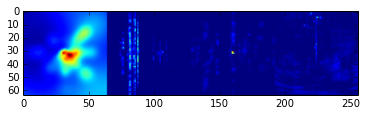

In [43]:
print joint_images.shape
#sanity check: sample image tuple, stacked horizontally
plt.imshow(np.hstack(joint_images[0]))

### read decays

In [44]:
#auxilary functions to preprocess decay data
import pandas as pd
def decayQuality(decayString):
    '''how orthodoxal KS is [lower = better]'''
    particle_codes = decayString.split('&')
    piplus_count = particle_codes.count('211')
    piminus_count = particle_codes.count('-211')
    
    if piplus_count ==0 and piminus_count ==0: return float('inf')
    
    return len(particle_codes) - piplus_count - piminus_count
def preprocess_decay_data(df_path,
                          min_decay_z = 500,
                          max_quality = 3,
                          max_origin_distance=500,
                          min_flight_distance = 0,
                          ):
    """load KS decay dataframe generated by /preprocess/KS_extractor.py 
    and filter out irrelevant decays (e.g. Ks->2pi0)"""
    
    print "reading",df_path

    
    decay_df = pd.DataFrame.from_csv(df_path,index_col=None,sep=';')
    decay_df.children = decay_df.children.astype(np.string_)

    print len(np.unique( (decay_df.runID,decay_df.eventID))),'events in dataframe'


    decay_df["originDistanceZ"] = (decay_df.originZ - decay_df.primaryZ)
    
    decay_df["decayQuality"] = map(decayQuality,decay_df.children)
    
    decay_vectors = decay_df[["decayX","decayY","decayZ"]].values
    origin_vectors = decay_df[["originX","originY","originZ"]].values
    decay_df["flightDistance"] = np.linalg.norm(decay_vectors-origin_vectors,axis=1)
    
    
    isGood = np.logical_and.reduce([
        decay_df.decayQuality <=max_quality,
        decay_df.originDistanceZ.abs() <= max_origin_distance,
        decay_df.flightDistance >= min_flight_distance,
        decay_df.decayZ >= min_decay_z
    ])
    good_decay_df = decay_df[isGood]
    print len(np.unique( (good_decay_df.runID,good_decay_df.eventID))),'events left with relevant decays'
    return good_decay_df

In [45]:
decay_df_paths = ["/mnt/KSfinder/mc_sig/KS_decays_5.csv","/mnt/KSfinder/mc_sig/KS_decays_6.csv"]

decay_dataframe_shards = map(preprocess_decay_data,decay_df_paths)

decays = pd.concat(decay_dataframe_shards)

print len(decays),'relevant decays total in all dataframes'
print 'grouping...'

#function (runID(int),eventID(int)) -> decays for this pair(df)
decay_groups = decays.groupby(["runID","eventID"],as_index=True)

#strip unused columns
decay_groups = decay_groups[[u'decayX',u'decayY',u'decayZ',u'children',u'flightDistance']]

#e.g. decay_groups.get_group((3695761 ,485762))
print 'done'

reading /mnt/KSfinder/mc_sig/KS_decays_5.csv
17573 events in dataframe
15137 events left with relevant decays
reading /mnt/KSfinder/mc_sig/KS_decays_6.csv
17664 events in dataframe
15096 events left with relevant decays
70204 relevant decays total in all dataframes
grouping...
done


# generate output via percentile mappers

In [46]:
from retina.percentile_grid import PercentileSpaceMapper1D
#on what PercentileSpaceMapper does, see percentile-mapper-tests.ipynb

xmapper = PercentileSpaceMapper1D(decays.decayX,n_centers=50,sigma=3.)
ymapper = PercentileSpaceMapper1D(decays.decayY,n_centers=50,sigma=3.)
zmapper = PercentileSpaceMapper1D(decays.decayZ,n_centers=50,sigma = 3.)


# Aggregation

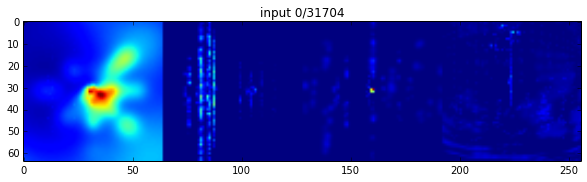

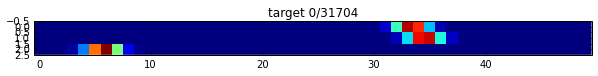

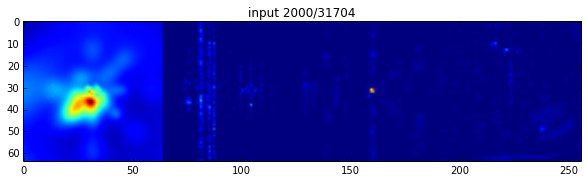

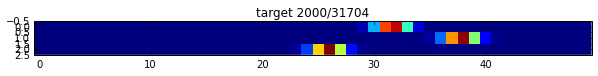

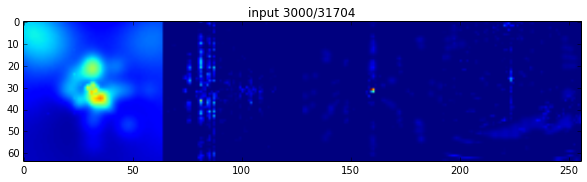

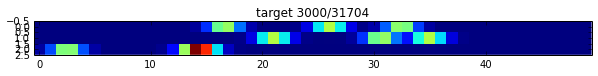

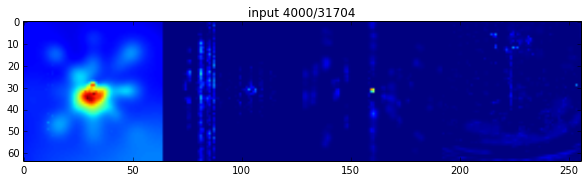

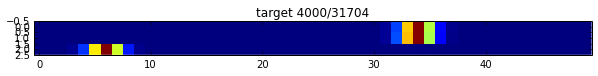

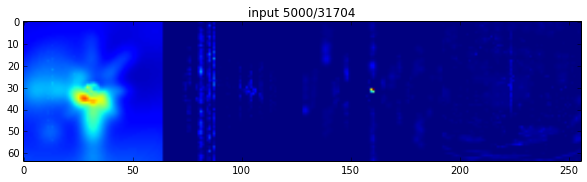

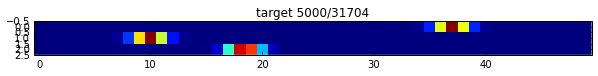

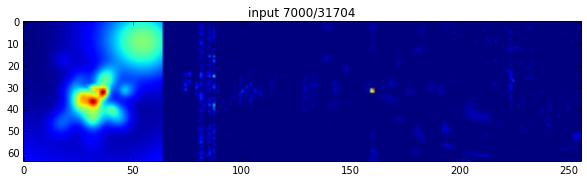

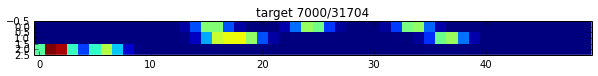

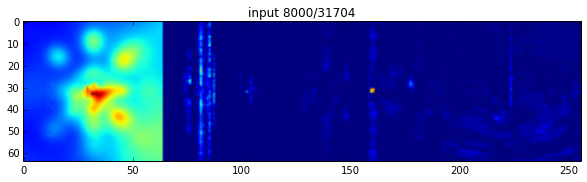

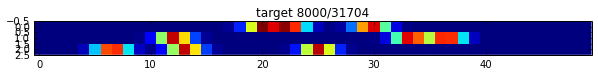

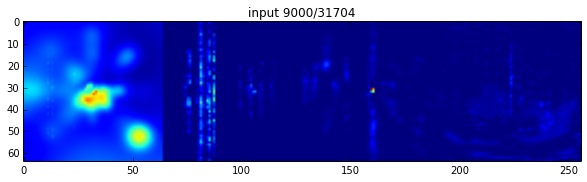

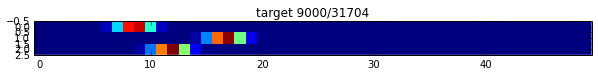

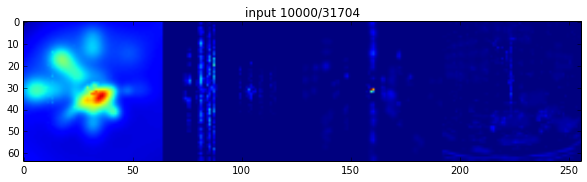

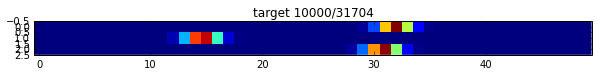

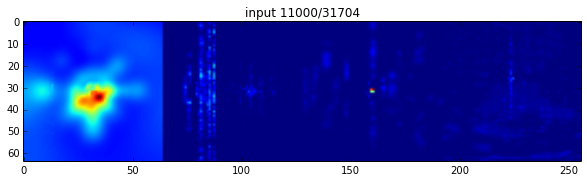

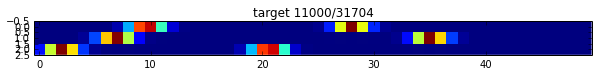

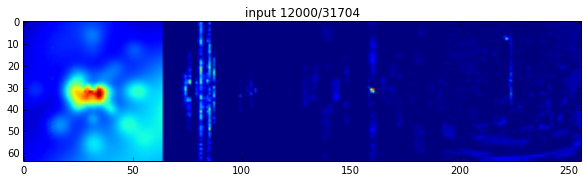

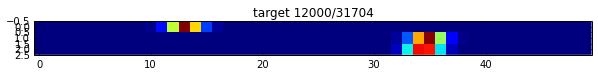

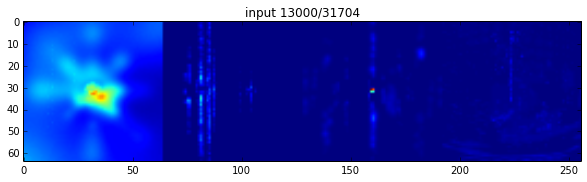

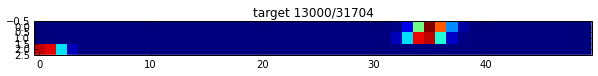

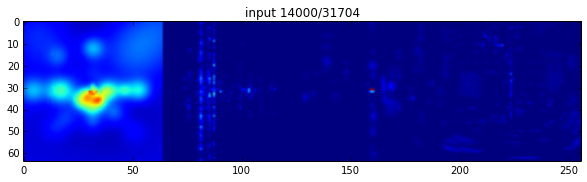

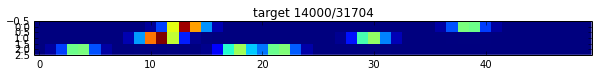

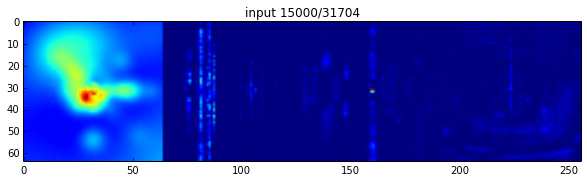

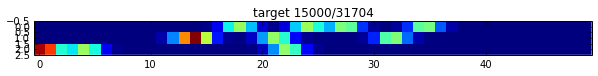

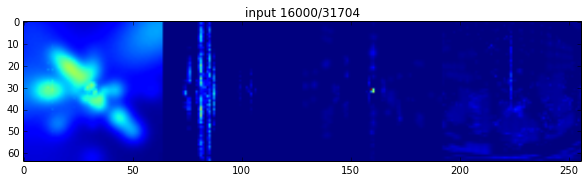

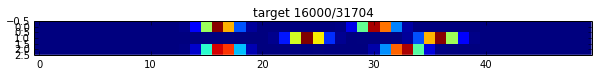

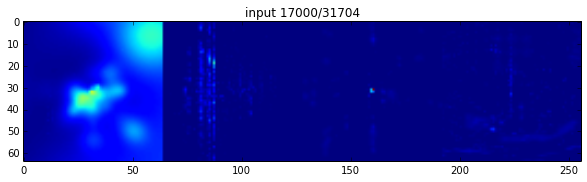

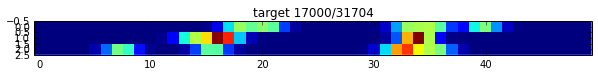

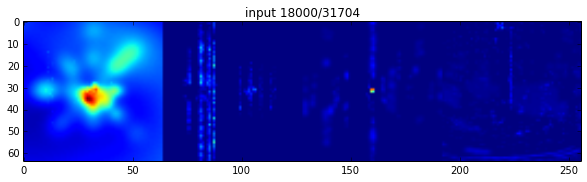

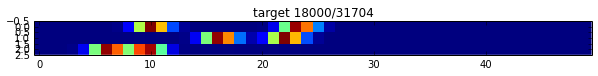

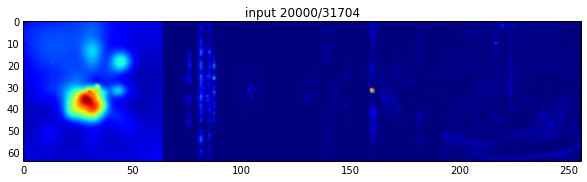

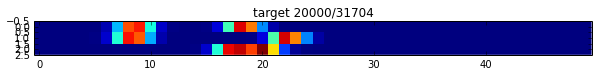

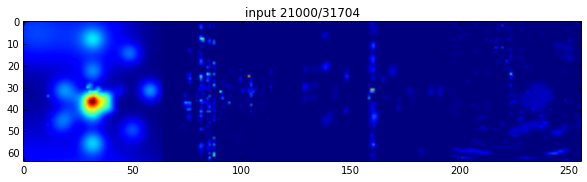

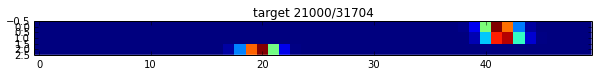

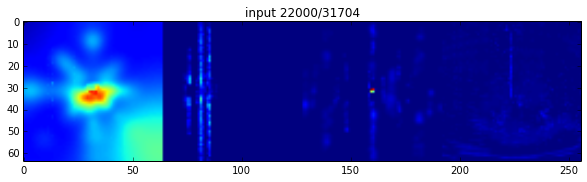

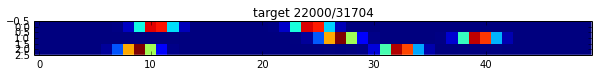

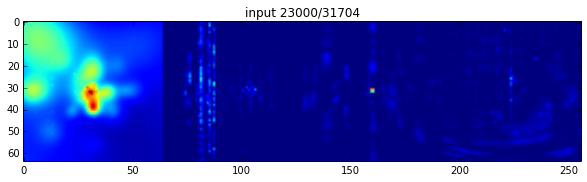

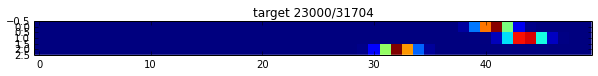

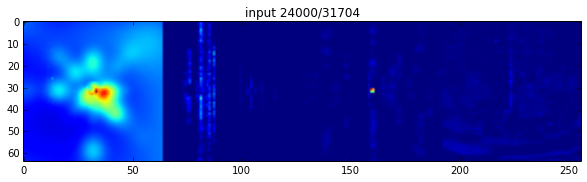

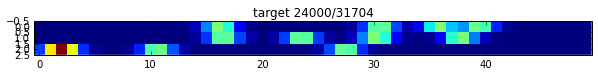

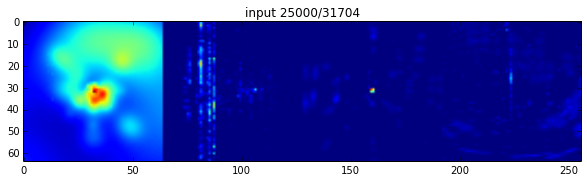

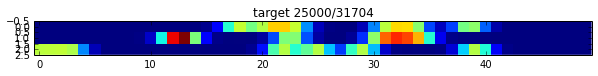

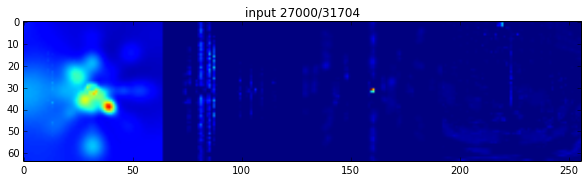

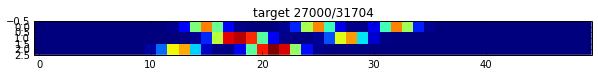

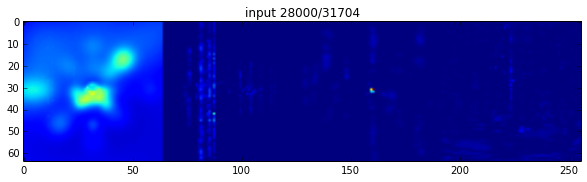

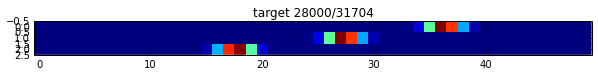

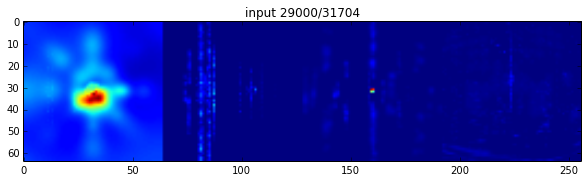

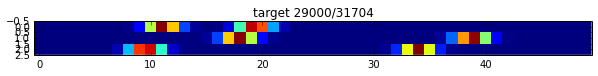

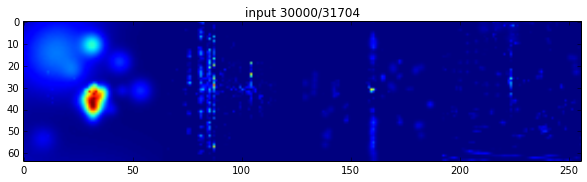

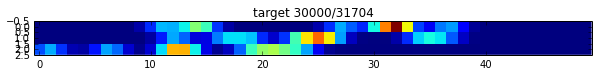

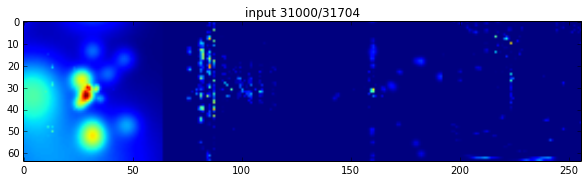

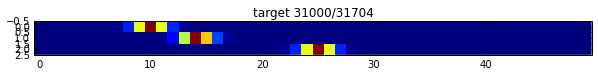

CPU times: user 2min 8s, sys: 13.4 s, total: 2min 21s
Wall time: 2min 21s


In [47]:
%%time

#aligning images with decays
# sorry i'm just too lazy to implement joblib parallelism here, 
# even so, it takes a tea cup to process 30k events


#runIDs,eventIDs are left from retina image preprocessing phase

X_images = []
y_images = []
for i,(runID,eventID,image_set) in enumerate(zip(runIDs,eventIDs,joint_images)):
    
    if (runID,eventID) not in decay_groups.groups:
        continue
    
    event_decays = decay_groups.get_group((runID,eventID))
    
    xmap = xmapper.get_activity_percentile(event_decays.decayX.values)
    ymap = ymapper.get_activity_percentile(event_decays.decayY.values)
    zmap = zmapper.get_activity_percentile(event_decays.decayZ.values)
    
    target = np.vstack([xmap,ymap,zmap])
    
    X_images.append(image_set)
    y_images.append(target)
    
    if i%1000==0:
        plt.figure(figsize = [10,3])
        plt.title("input %s/%s"%(i,len(joint_images)))
        plt.imshow(np.hstack(image_set))
        plt.show()

        plt.figure(figsize = [10,3])
        plt.title("target %s/%s"%(i,len(joint_images)))
        plt.imshow(target,interpolation='none')
        plt.show()
    
    

In [48]:
prepend_dim = lambda img:img[np.newaxis,...]

X = np.concatenate(map(prepend_dim,X_images))
y = np.concatenate(map(prepend_dim,y_images))
print X.shape, y.shape

(27185, 4, 64, 64) (27185, 3, 50)


In [49]:
np.save(os.path.join(output_folder,"ksfinder_images.npy"),X)
np.save(os.path.join(output_folder,"ksfinder_targets.npy"),y)